## Align Zoom and Notebook Side By Side

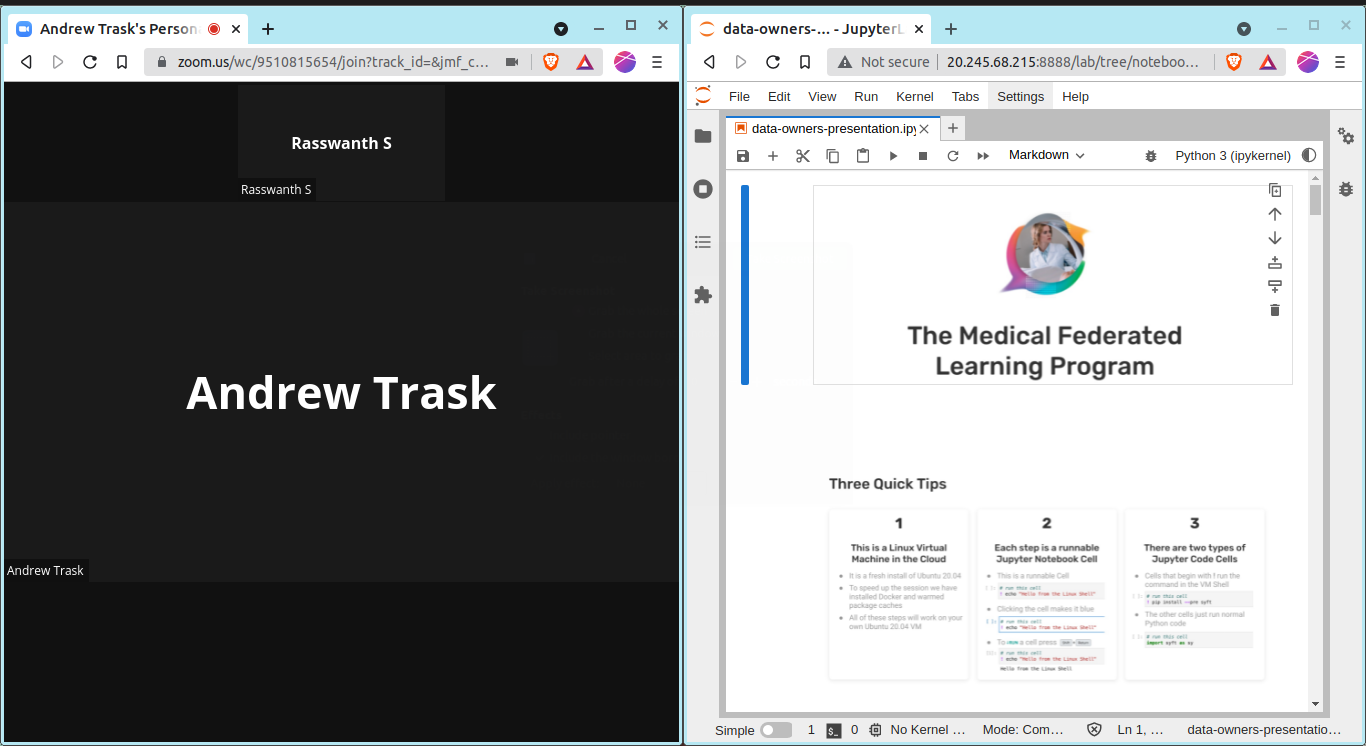

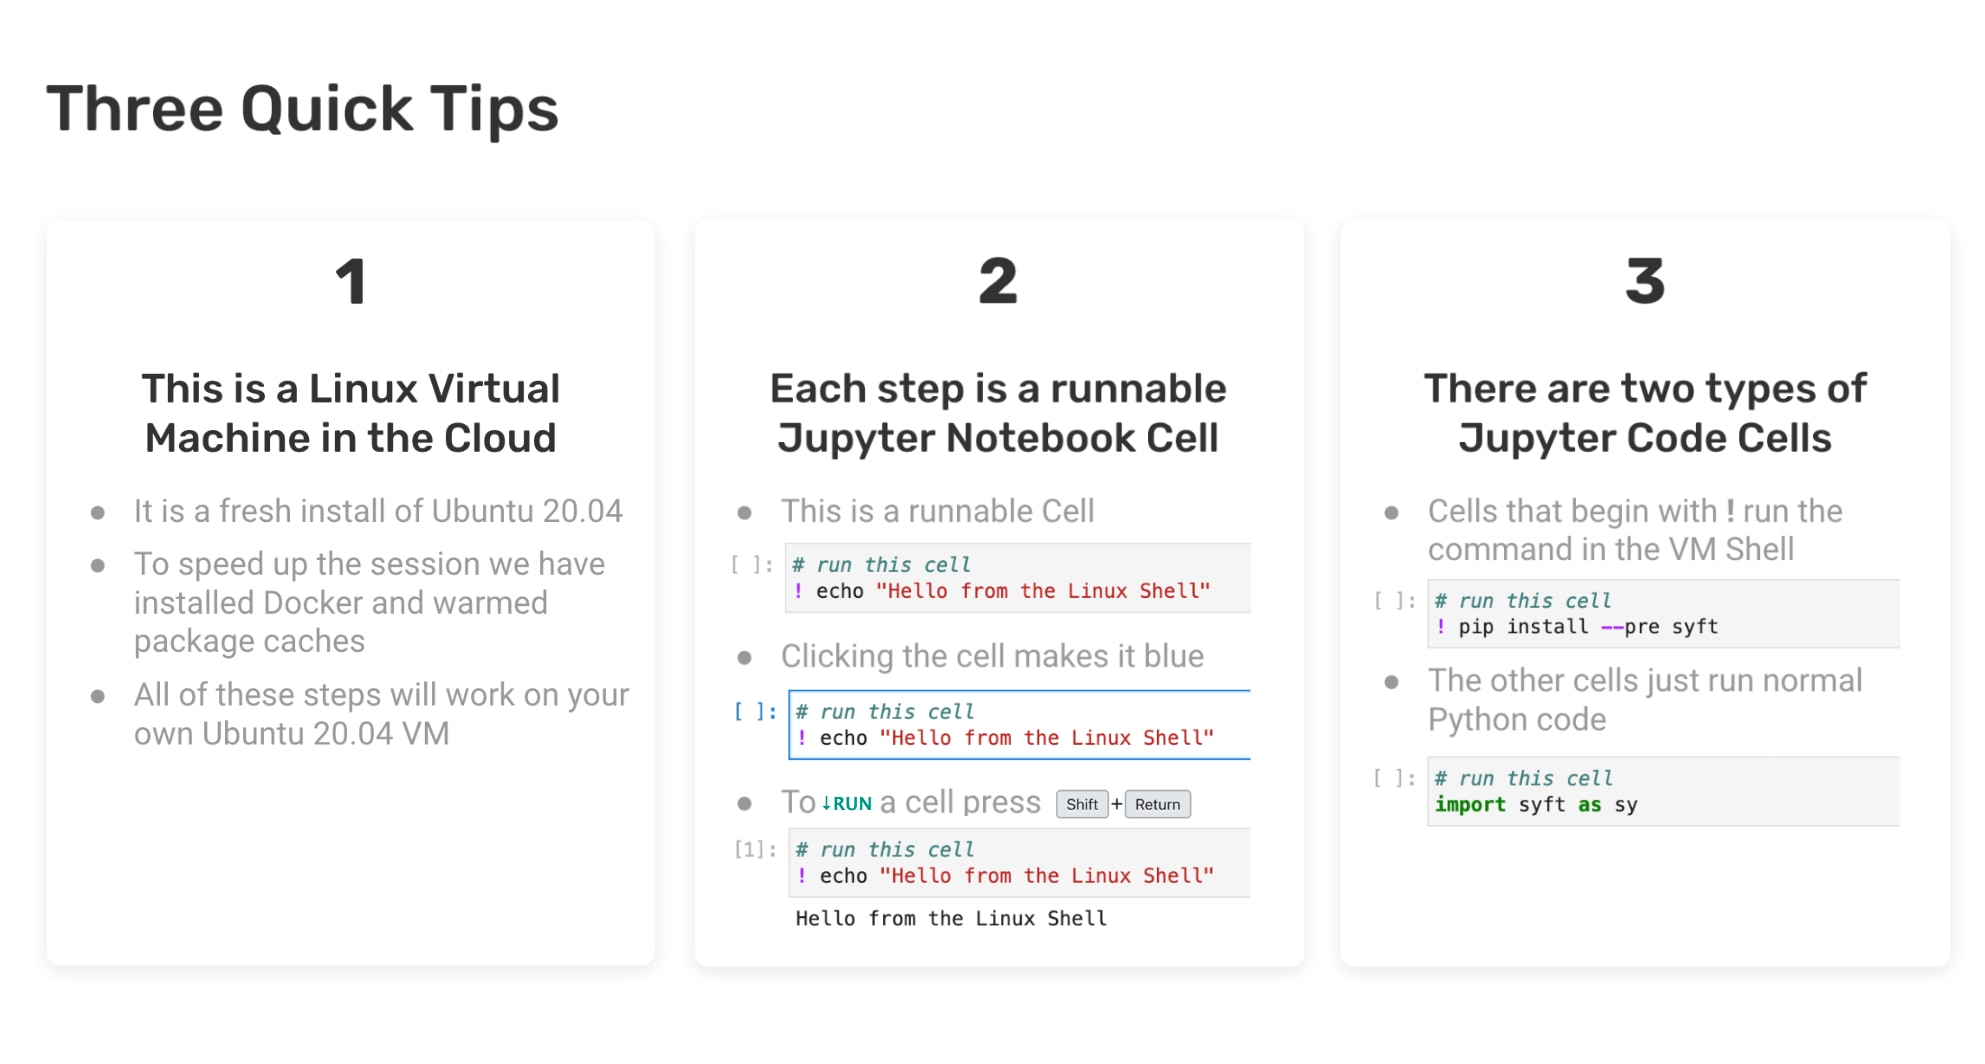

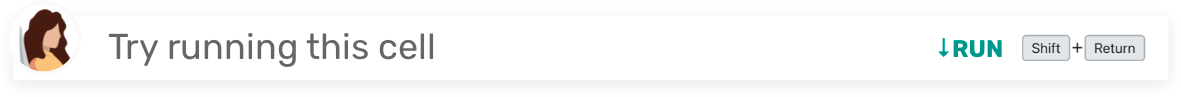

In [ ]:
# run this cell
! echo "Hello from the Linux Shell"

! echo "\n✅ Step Complete\n"

<br /><br />

<br /><br />

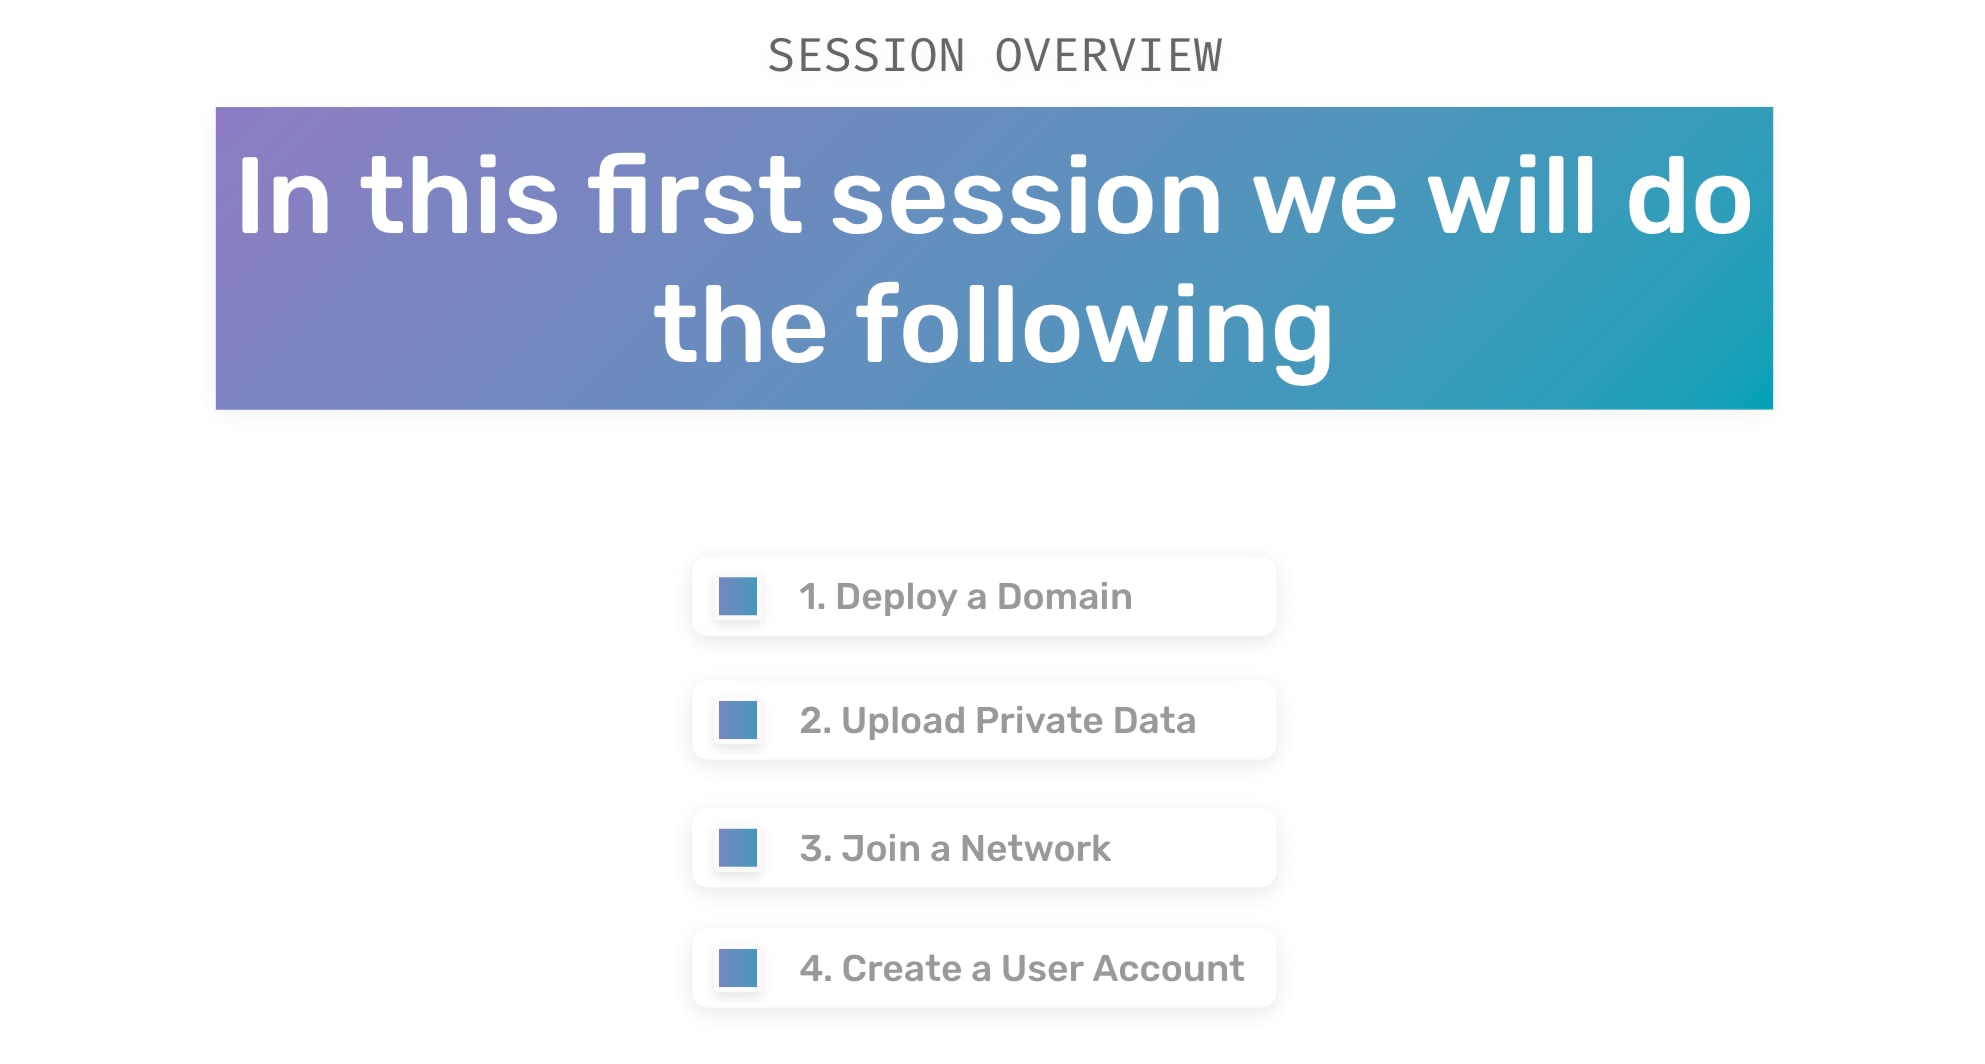

<br /><br />

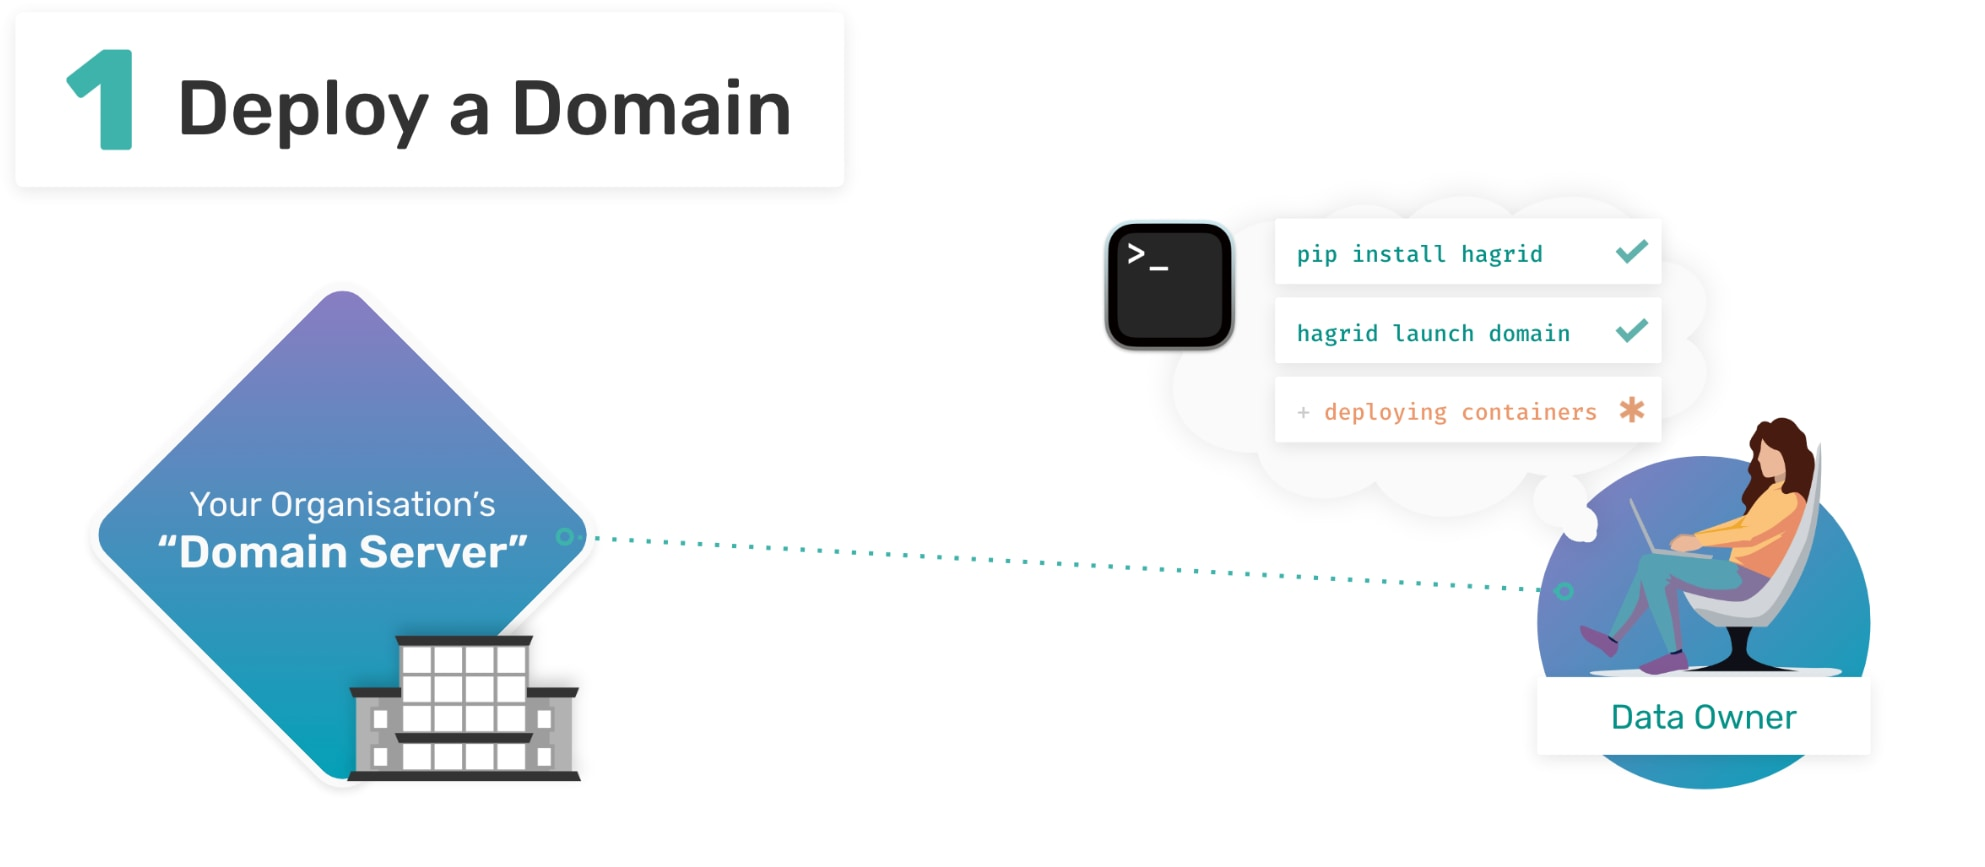

<br /><br />

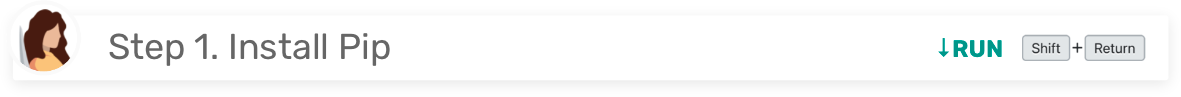

In [ ]:
# run this cell
! sudo apt update && sudo apt install python3-pip

! echo "\n✅ Step Complete\n"

<br /><br />

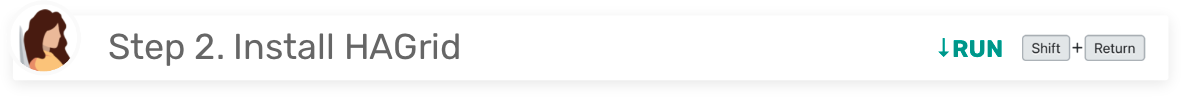

In [ ]:
# run this cell
! pip install -U hagrid

! echo "\n✅ Step Complete\n"

<br /><br />

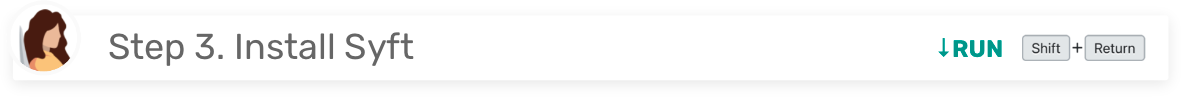

In [ ]:
# run this cell
! pip install --pre -U syft

! echo "\n✅ Step Complete\n"

<br /><br />

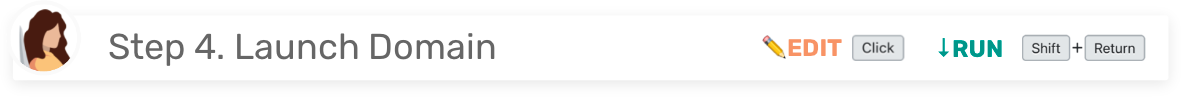

In [ ]:
# edit DOMAIN_NAME and run this cell

DOMAIN_NAME = ""

! hagrid launch {DOMAIN_NAME} to docker:80 --tag=latest --tail=false --silent

! echo "\n✅ Step Complete\n"

<br /><br />

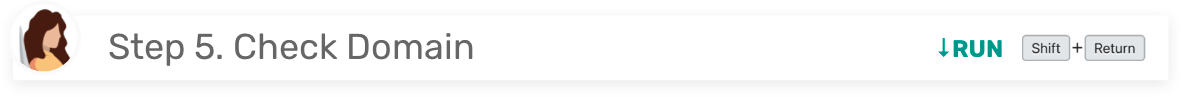

In [ ]:
# run this cell
! hagrid check "localhost:80" --wait --silent

! echo "\n✅ Step Complete\n"

<br /><br />

<br /><br />

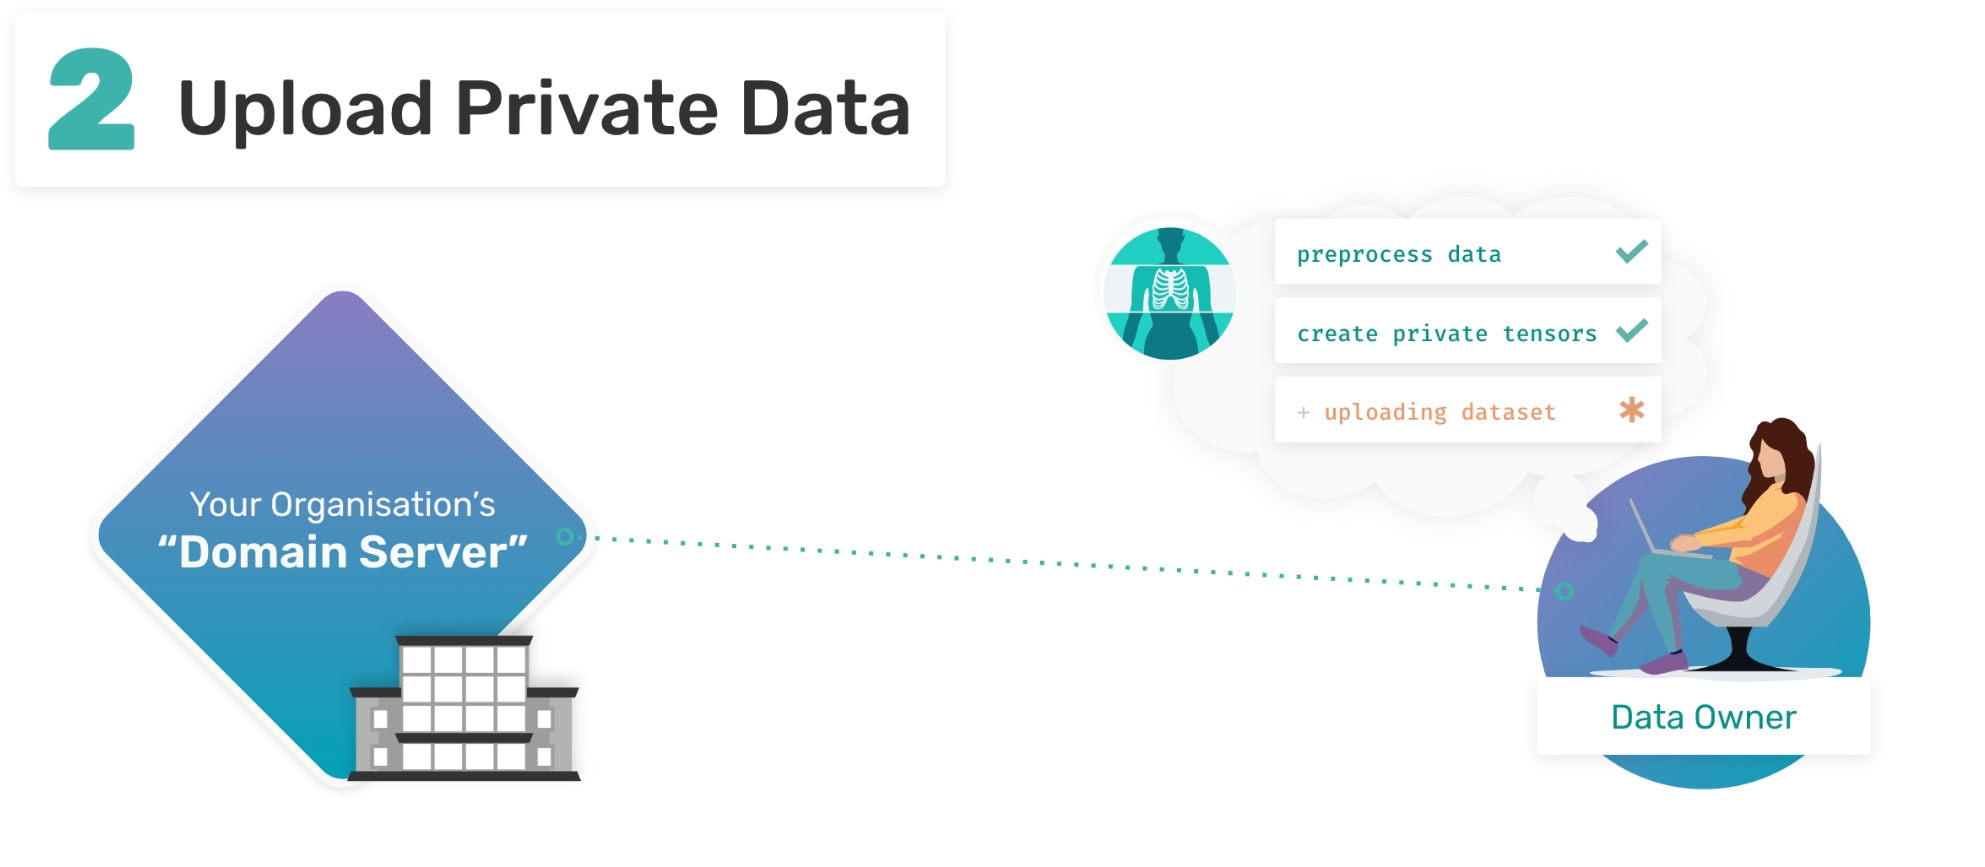

<br /><br />

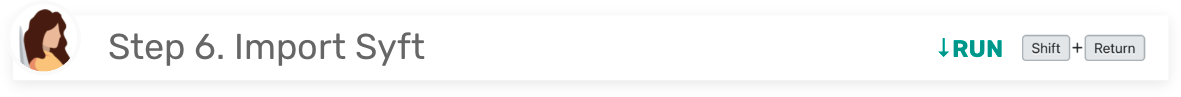

In [1]:
# run this cell
import syft as sy
from utils import *
print("Syft is imported")

/home/shubham/anaconda3/envs/syft/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Syft is imported


<br /><br />

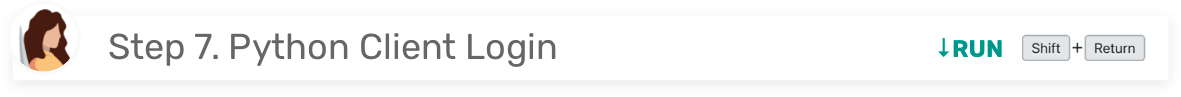

In [41]:
domain_client = sy.login(
    url="localhost:8082",
    email="info@openmined.org",
    password="changethis"
)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to localhost... done! 	 Logging into usa... done!


<br /><br />

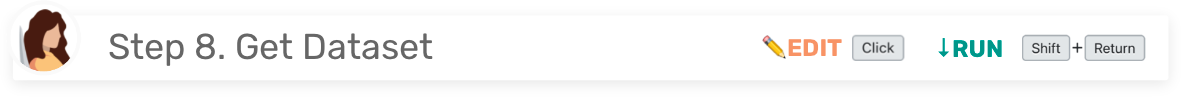

In [42]:
# add url to MY_DATASET_URL then run this cell

MY_DATASET_URL = "https://raw.githubusercontent.com/OpenMined/PySyft/dev/notebooks/trade_demo/datasets/united%20states%20of%20america%20-%20mar%202022.csv"

# MY_DATASET_URL = "https://raw.githubusercontent.com/OpenMined/PySyft/dev/notebooks/trade_demo/datasets/canada%20-%20mar%202022.csv"

trade_dataset = download_dataset_as_dataframe(MY_DATASET_URL)


Data shape:  (171, 22)

Data Columns:  ['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level', 'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code', 'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO', 'Commodity Code', 'Commodity', 'Qty Unit Code', 'Qty Unit', 'Qty', 'Netweight (kg)', 'Trade Value (US$)', 'Flag']

Unique Trade Flows:  ['Imports' 'Exports' 'Re-exports' 'Re-imports']


<br /><br />

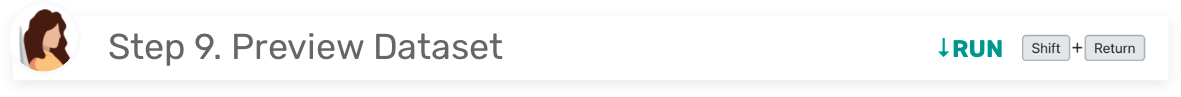

In [43]:
trade_dataset.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Netweight (kg),Trade Value (US$),Flag
0,HS,2022,202203,Mar-22,0,0,1,Imports,31,Azerbaijan,...,United States of America,NaN,TOTAL,All Commodities,NaN,NaN,NaN,0.0,26231855,0
1,HS,2022,202203,Mar-22,0,0,2,Exports,31,Azerbaijan,...,United States of America,NaN,TOTAL,All Commodities,NaN,NaN,NaN,0.0,17684283,0
2,HS,2022,202203,Mar-22,0,0,1,Imports,32,Argentina,...,United States of America,NaN,TOTAL,All Commodities,NaN,NaN,NaN,0.0,659172702,0
3,HS,2022,202203,Mar-22,0,0,2,Exports,32,Argentina,...,United States of America,NaN,TOTAL,All Commodities,NaN,NaN,NaN,0.0,626419270,0
4,HS,2022,202203,Mar-22,0,0,1,Imports,36,Australia,...,United States of America,NaN,TOTAL,All Commodities,NaN,NaN,NaN,0.0,3022713125,0


In [44]:
trade_dataset.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       'Commodity Code', 'Commodity', 'Qty Unit Code', 'Qty Unit', 'Qty',
       'Netweight (kg)', 'Trade Value (US$)', 'Flag'],
      dtype='object')

<br /><br />

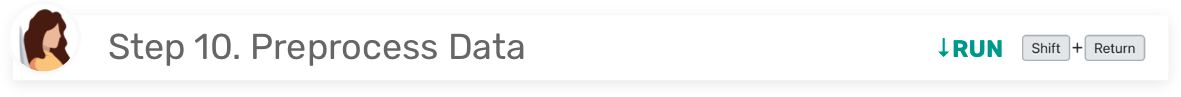

In [45]:
# run this cell

# Filter trade details of imported commodities
imports = trade_dataset[trade_dataset['Trade Flow'] == "Imports"]

# Filter trade details of exported commodities
exports = trade_dataset[trade_dataset['Trade Flow'] == "Exports"]

In [46]:
# run this cell

# Extract the trade value of the imported commodities
trade_value_of_imported_commodites = imports['Trade Value (US$)'].to_numpy()

# Extract the trade value of the exported commodities
trade_value_of_exported_commodites = exports['Trade Value (US$)'].to_numpy()

<br /><br />

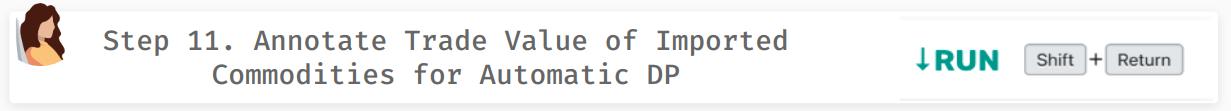

In [47]:
# run this cell

# Filter out the countries from which commodities were imported
countries_from_which_commodities_are_imported = imports["Reporter"]

# calculate min and max values of the trade value of imported commodities
trade_value_of_imported_commodites.min(), trade_value_of_imported_commodites.max()

(5148162, 30393583465)

In [48]:
# run this cell

# annotate traded value of imported commodities with dp metadata
imports_data = sy.Tensor(trade_value_of_imported_commodites).annotated_with_dp_metadata(
    min_val=0, 
    max_val=2e12, 
    data_subjects=countries_from_which_commodities_are_imported
)

Tensor annotated with DP Metadata


<br /><br />

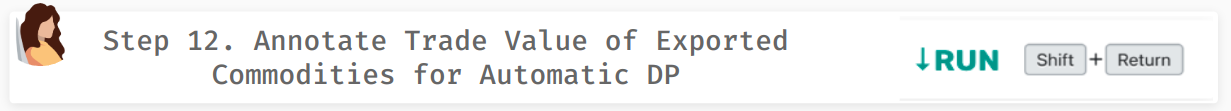

In [49]:
# run this cell

# Filter out the countries to which commodities were exported
countries_to_which_commodities_are_exported = exports["Reporter"]

# calculate min and max values of the trade value of exported commodities
trade_value_of_exported_commodites.min(), trade_value_of_exported_commodites.max()

(151500, 49138028621)

In [50]:
# run this cell

# annotate traded value of exported commodities with dp metadata
exports_data = sy.Tensor(trade_value_of_exported_commodites).annotated_with_dp_metadata(
    min_val=0, 
    max_val=2e12, 
    data_subjects=countries_to_which_commodities_are_exported
)

Tensor annotated with DP Metadata


<br /><br />

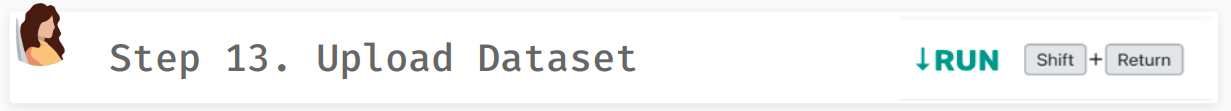

In [51]:
imports_data.child.data_subjects.shape

(73,)

In [52]:
# run this cell

# Upload data to the domain
domain_client.load_dataset(
    name="Imports and Exports Trade dataset Feb 2021 - II",
    assets={
        "imports": imports_data, 
        "exports": exports_data
    },
    description="This dataset contains information about all of imports and exports \
    in the month of Feb 2021. Measured in USD.",
)

Loading dataset... uploading...🚀                        

Uploading `exports`: 100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 228.83it/s]

Dataset is uploaded successfully !!! 🎉

Run `<your client variable>.datasets` to see your new dataset loaded into your machine!


<br /><br />

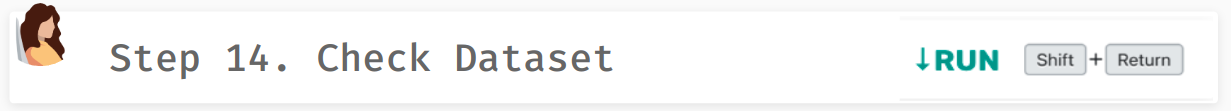

In [37]:
# run this cell
domain_client.datasets

Idx,Name,Description,Assets,Id
[0],Imports and Exports Trade dataset Feb 2021 - II,This dataset contains information about all of imports and exports in the month of Feb 2021. Measured in USD.,"[""imports""] -> [""exports""] ->",5926419a-a887-4cc7-9349-22201c6239ff


In [53]:
# run this cell
data_scientist_details = domain_client.create_user(
    name="sheldon",
    email="test@test.com",
    password="password",
    budget=999
)

User created successfully!


<br /><br />

<br /><br />

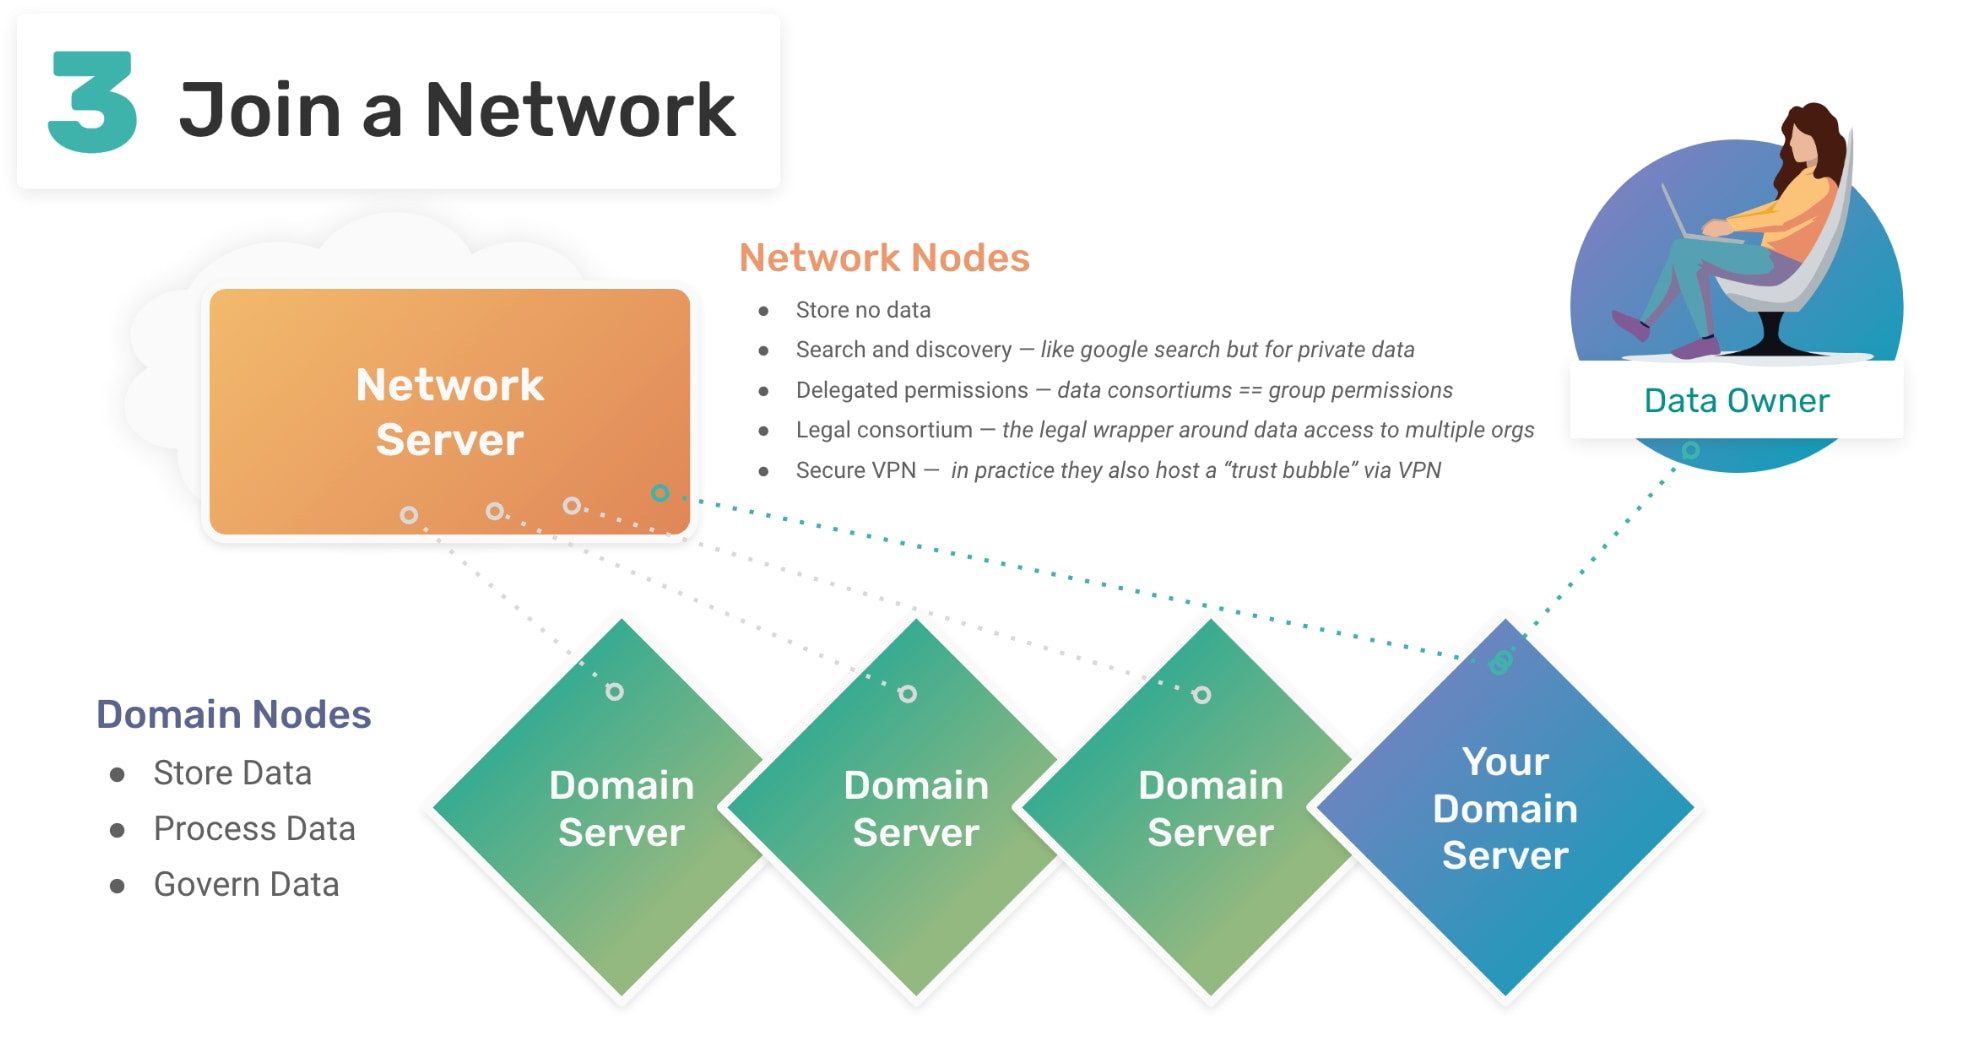

<br /><br />

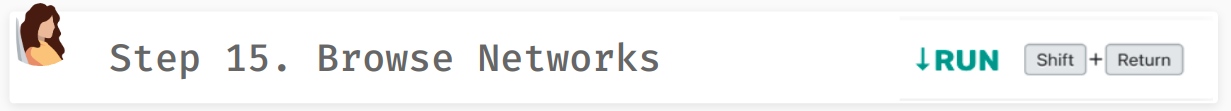

In [ ]:
# run this cell
sy.networks

<br /><br />

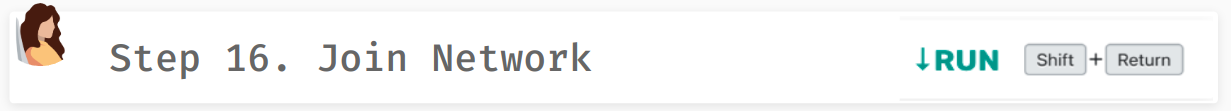

In [ ]:
# run this cell
NETWORK_NAME = "UN PET Lab Network"
network_client = sy.networks[NETWORK_NAME]
domain_client.apply_to_network(network_client)

<br /><br />

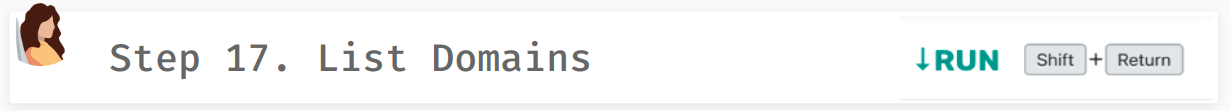

In [ ]:
# run this cell
network_client.domains

<br /><br />

<br /><br />

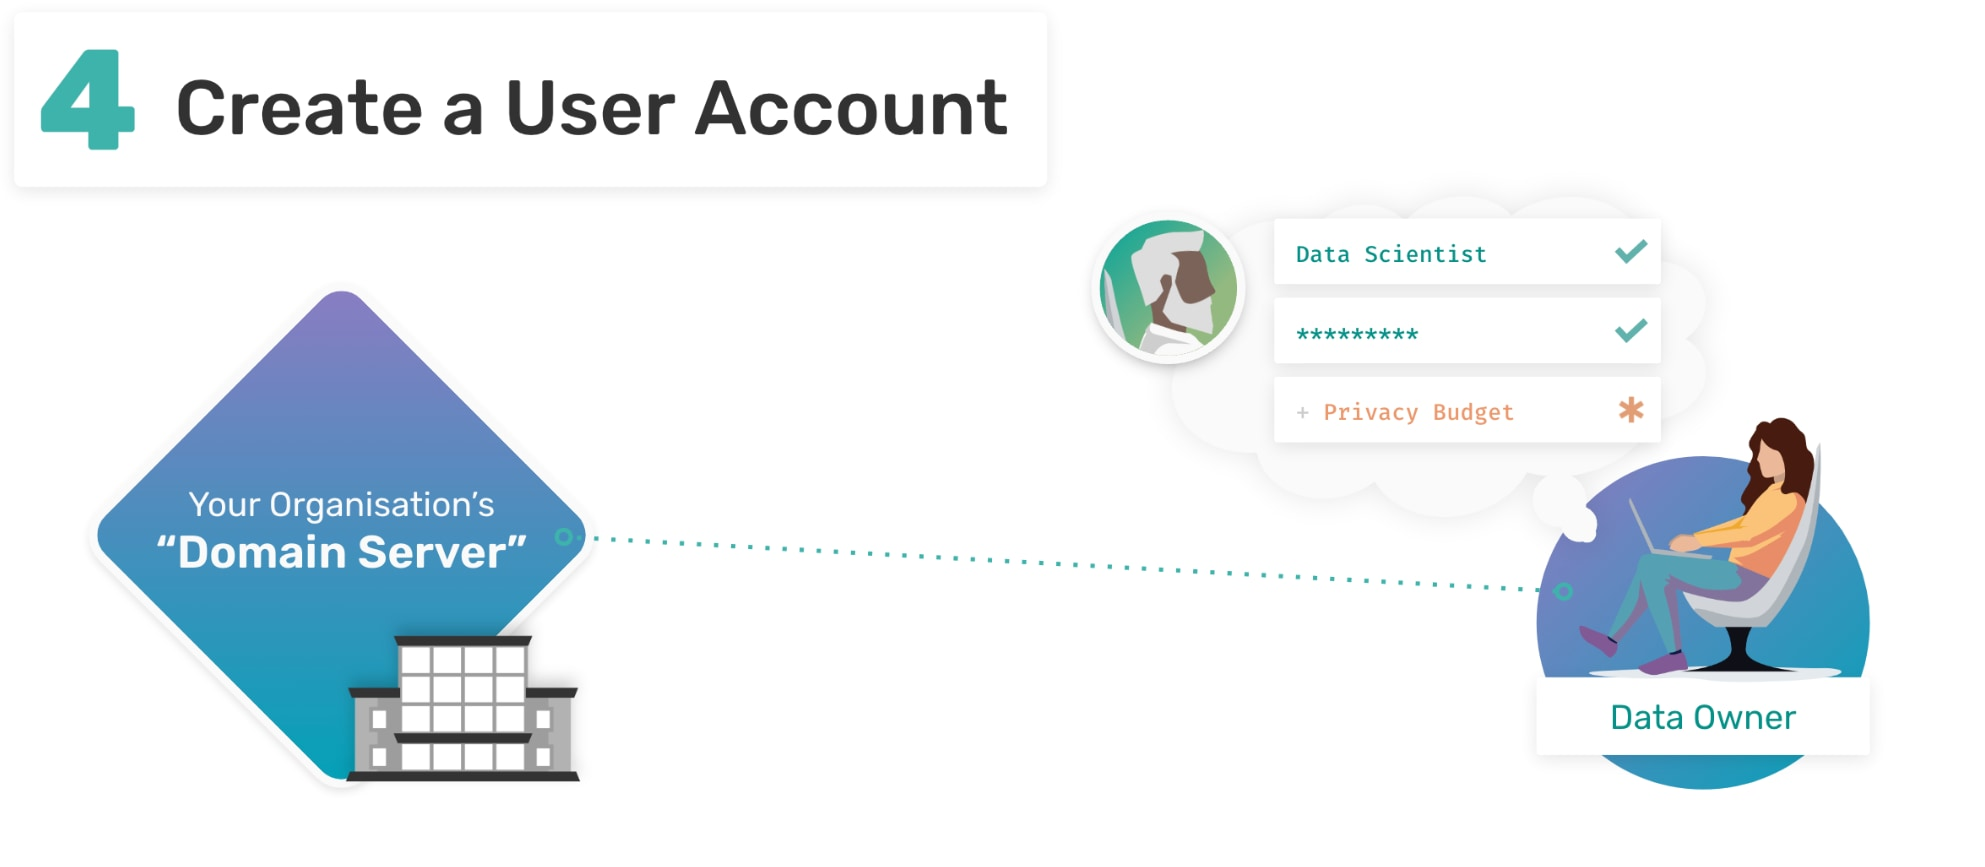

<br /><br />

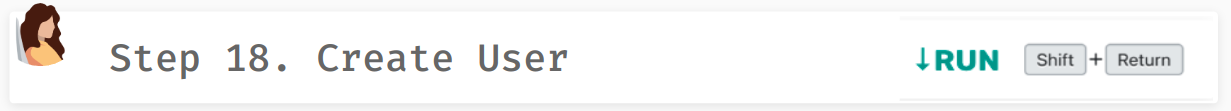

In [17]:
# run this cell
data_scientist_details = domain_client.create_user(
    name="sheldon",
    email="test@test.com",
    password="password",
    budget=999
)

User created successfully!


<br /><br />

In [18]:
domain_client.store

,ID,Tags,Description,object_type
0,<UID: 8244309c9caa4e72ac0b9b425a0dbf67>,"[#imports, sum]",,<class 'syft.core.tensor.tensor.Tensor'>
1,<UID: 435d1f8b80b34804b45cb7ff4ed85c47>,[#exports],,<class 'syft.core.tensor.tensor.Tensor'>
2,<UID: 0a10a8db37e048b08fe77d5f172b3888>,[#imports],,<class 'syft.core.tensor.tensor.Tensor'>
3,<UID: 431e45da2ffe4566ab7b17d492391dd5>,[#exports],,<class 'syft.core.tensor.tensor.Tensor'>
4,<UID: 531c6459212941acab86b5033165b9eb>,[#imports],,<class 'syft.core.tensor.tensor.Tensor'>


In [21]:
ptr = domain_client.store["dde4c3e93d024259a12fd24541ce5021"]

In [31]:
ptr.get(delete_obj=False).child.dtype

dtype('int64')

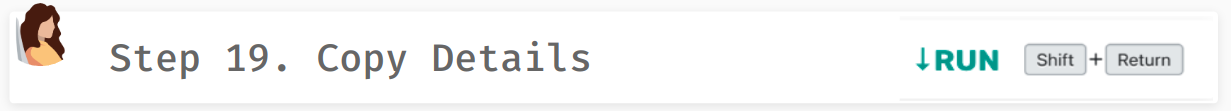

In [ ]:
# run this cell then copy the output
print("Please give these details to the Data Scientist 👇🏽")
print(data_scientist_details)

<br /><br />

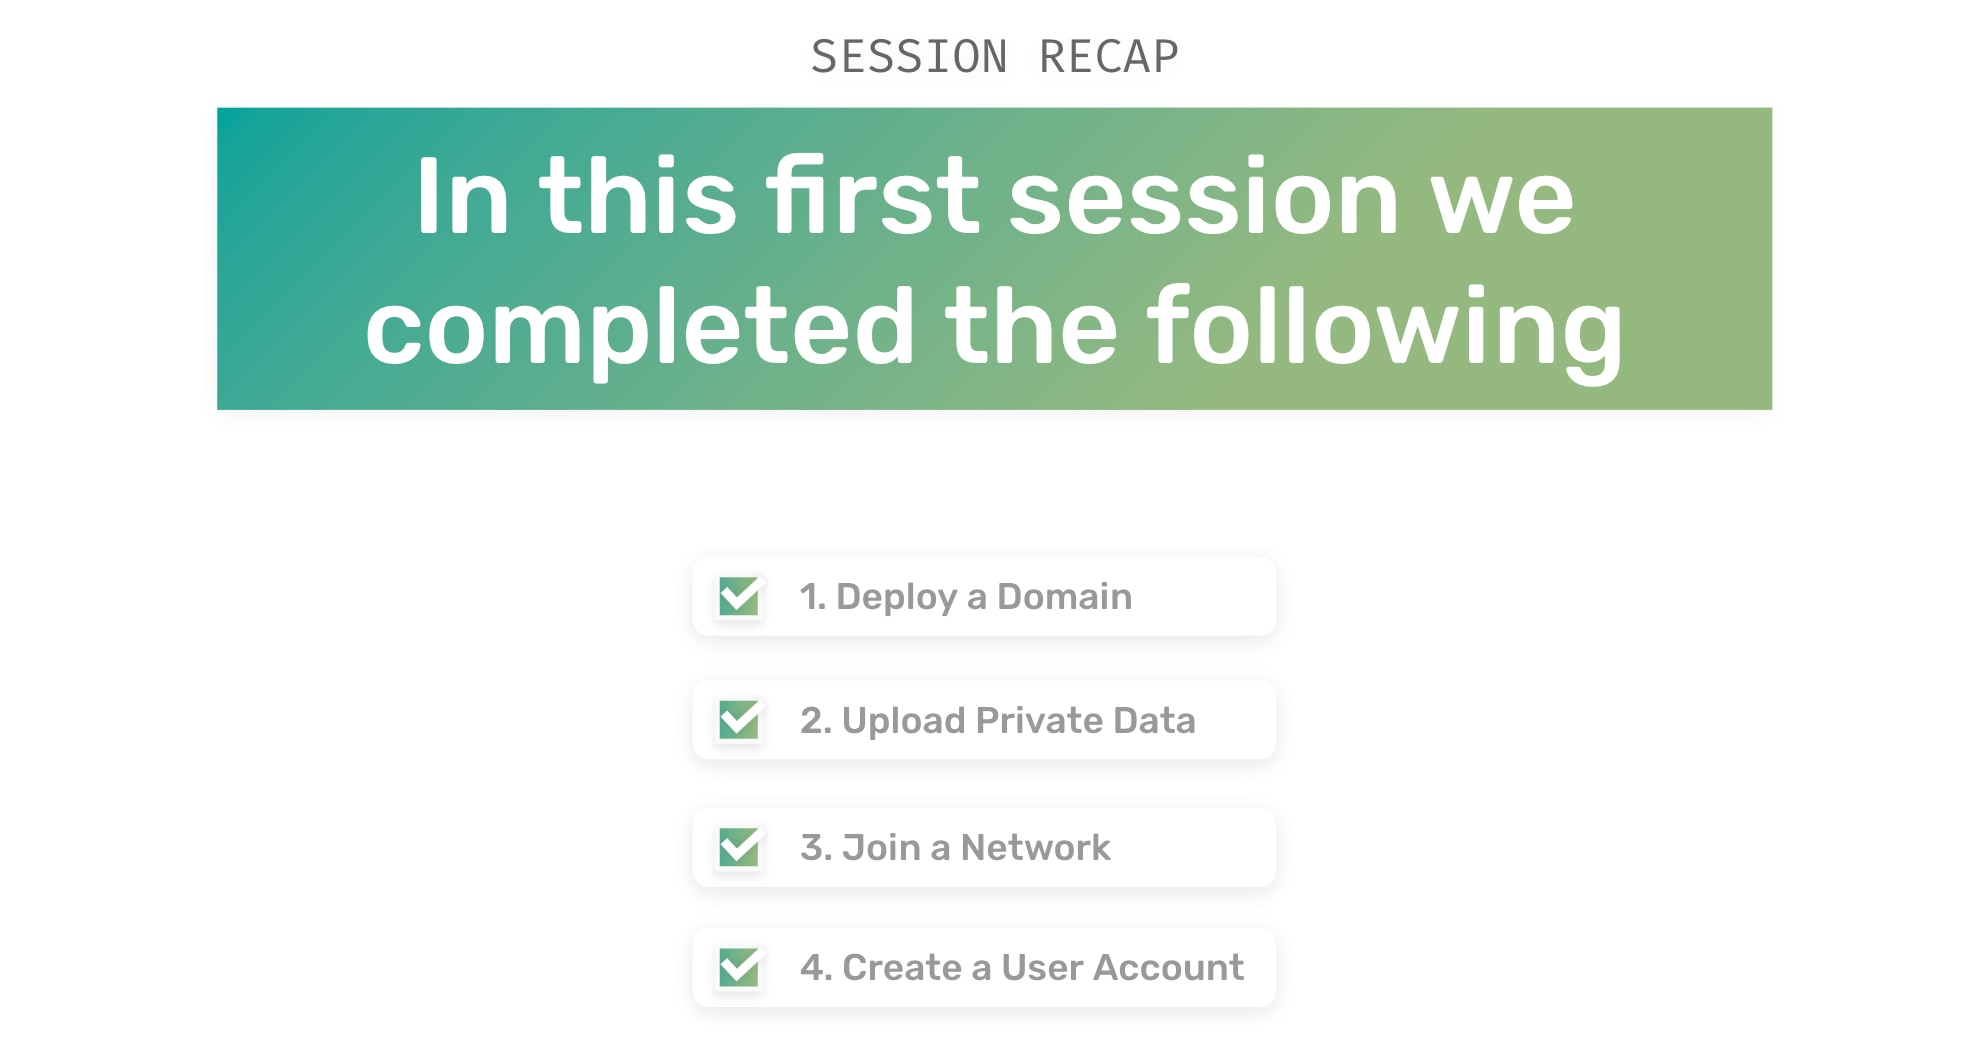

<br /><br />

# Thank You

If you have any questions for our team please don't hesitate to reach out via email or the slack link below.

# Links

🌍 Web:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://blog.openmined.org/  
💬 Slack:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://openmined.slack.com/  
🎥 Course:&nbsp;&nbsp; https://courses.openmined.org/  
📰 Blog:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://blog.openmined.org/  
🐙 Code:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://github.com/OpenMined/PySyft